Remove StandardHours and OVer18 columns because all the values are same. Remove BusinessTravel as 71% of employees travel rarely. Remove Daily Rate, Hourly Rate and Monthly Rate because these are all derived attributes to reduce multi-collinearity(dimensionality reduction). Remove EmployeeCount as the value is 1 for all.

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

EducationField 1 'Life Sciences' 2 'Medical' 3 'Marketing' 4 'Technical Degree' 5 'Human Resources' 6 'Other'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

MaritialStatus 1 'Single' 2 'Married' 3 'Divorced'

Gender 1 'Male' 2 'Female'

JobRole 1 'Sales Executive' 2 'Research Scientist' 3 'Laboratory Technician' 4 'Manufacturing Director' 5 'Healthcare Representative' 6 'Manager' 7 'Sales Representative' 8 'Research Director' 9 'Human Resources'

OverTime 1 'Yes' 2 'No'

Department 1 'Sales' 2 'Research & Development' 3 'Human Resources'

Attrition 1 'Yes' 2 'No'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("hr_dataset.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.shape

(1470, 35)

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [8]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [9]:
data.Over18.unique()

array(['Y'], dtype=object)

In [10]:
data.StandardHours.unique()

array([80], dtype=int64)

In [11]:
data.EmployeeCount.unique()

array([1], dtype=int64)

In [12]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
#We remove the following columns as these have a very less impact on the attrition of an employee
df=data.drop(columns=['Over18','StandardHours','EmployeeCount','BusinessTravel','DailyRate','MonthlyRate','HourlyRate','EmployeeNumber'])

In [14]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   Gender                    1470 non-null   object
 8   JobInvolvement            1470 non-null   int64 
 9   JobLevel                  1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [16]:
df1=df.copy()

In [17]:
df1['Attrition'] = df1['Attrition'].apply(lambda x: 1 if x=='No' else 2)
df1['Gender'] = df1['Gender'].apply(lambda x: 1 if x=='Male' else 2)
df1['OverTime'] = df1['OverTime'].apply(lambda x: 2 if x=='No' else 1)
#Marital Status
MaritalStatus_map = {'Single':1, 'Married':2, 'Divorced':3}
df1['MaritalStatus'] = df1['MaritalStatus'].map(MaritalStatus_map)
#Education Field
EducationField_map = {'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,
                     'Human Resources':5, 'Other':6}
df1['EducationField'] = df1['EducationField'].map(EducationField_map)
#Job Role
JobRole_map = {'Sales Executive':1,'Sales Representative':2,'Laboratory Technician':3,'Manufacturing Director':4,
              'Healthcare Representative':5,'Manager':6,'Research Scientist':7,'Research Director':8,'Human Resources':9}
df1['JobRole'] = df1['JobRole'].map(JobRole_map)
#Department
Department_map = {'Sales':1, 'Research & Development':2, 'Human Resources':3}
df1['Department'] = df1['Department'].map(Department_map)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   Department                1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EducationField            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   Gender                    1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobRole                   1470 non-null   int64
 11  JobSatisfaction           1470 non-null   int64
 12  MaritalStatus             1470 non-null   int64
 13  MonthlyIncome             1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

In [18]:
df1.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1,1,2,1,2,2,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,2,8,1,1,3,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,2,2,6,4,1,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,2,3,4,1,4,2,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,2,1,2,1,1,3,1,...,3,4,1,6,3,3,2,2,2,2


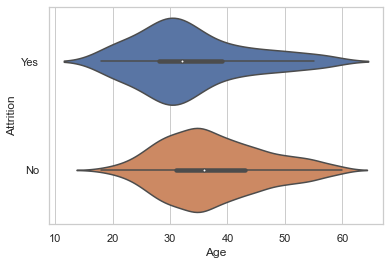

In [19]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=data["Age"], y=data["Attrition"])

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

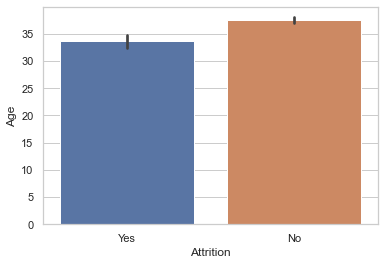

In [20]:
sns.barplot(x = 'Attrition',y = 'Age',data = data)

In [21]:
data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

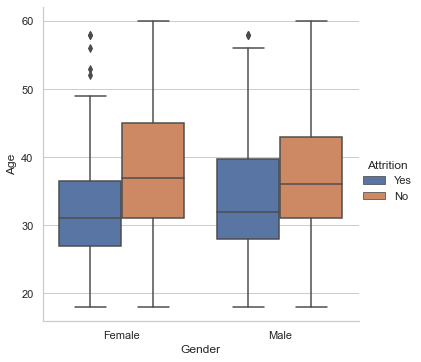

In [22]:
sns.catplot(x="Gender", y="Age", hue="Attrition", kind="box", data=data)

C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='Age'>

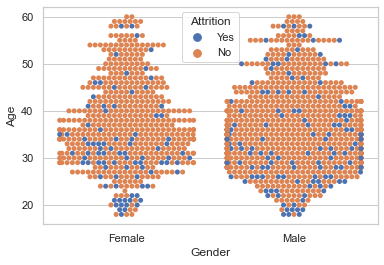

In [23]:
sns.swarmplot(x="Gender", y="Age", hue="Attrition",data=data,edgecolor="gray")

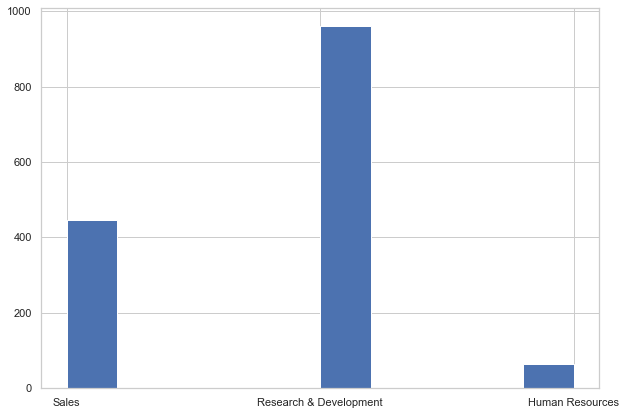

In [24]:
fig = plt.figure(figsize =(10, 7))
plt.hist(data["Department"])
plt.show()

In [25]:
(data.groupby(["Department","Gender"]).count()["Age"])

Department              Gender
Human Resources         Female     20
                        Male       43
Research & Development  Female    379
                        Male      582
Sales                   Female    189
                        Male      257
Name: Age, dtype: int64

In [26]:
du=(df.groupby(["Gender","Attrition"]).count()["Age"]/df.groupby(["Gender"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Gender Attrition          
Female No         0.852041
       Yes        0.147959
Male   No         0.829932
       Yes        0.170068

<AxesSubplot:xlabel='Gender,Attrition'>

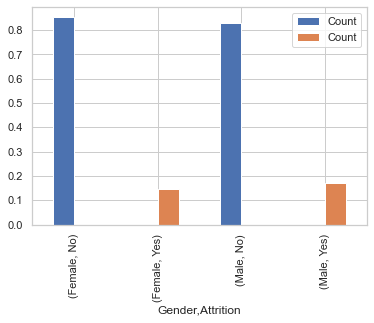

In [27]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [28]:
du=(df.groupby(["Department","Attrition"]).count()["Age"]/df.groupby(["Department"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Department             Attrition          
Human Resources        No         0.809524
                       Yes        0.190476
Research & Development No         0.861602
                       Yes        0.138398
Sales                  No         0.793722
                       Yes        0.206278

<AxesSubplot:xlabel='Department,Attrition'>

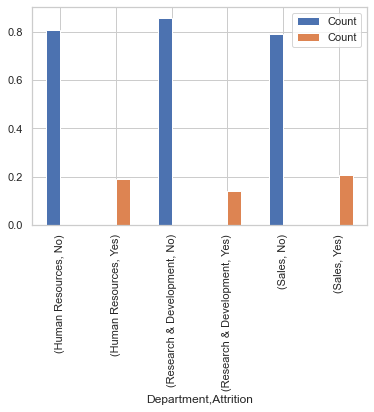

In [29]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

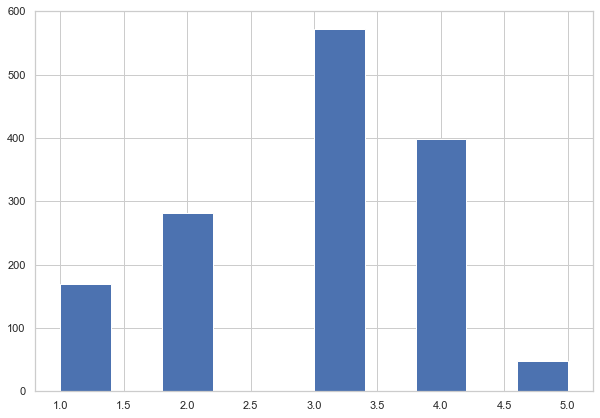

In [30]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["Education"])
plt.show()

In [31]:
du=(df.groupby(["Education","Attrition"]).count()["Age"]/df.groupby(["Education"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Education Attrition          
1         No         0.817647
          Yes        0.182353
2         No         0.843972
          Yes        0.156028
3         No         0.826923
          Yes        0.173077
4         No         0.854271
          Yes        0.145729
5         No         0.895833
          Yes        0.104167

<AxesSubplot:xlabel='Education,Attrition'>

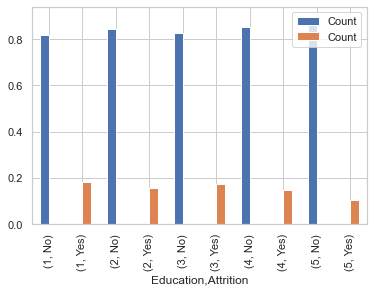

In [32]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [33]:
du=(df.groupby(["Education","Gender"]).count()["Age"]/df.groupby(["Education"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Education Gender          
1         Female  0.352941
          Male    0.647059
2         Female  0.414894
          Male    0.585106
3         Female  0.410839
          Male    0.589161
4         Female  0.386935
          Male    0.613065
5         Female  0.458333
          Male    0.541667

<AxesSubplot:xlabel='Education,Gender'>

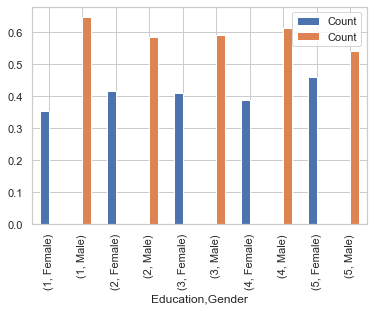

In [34]:
female=du.iloc[::2]
male=du.iloc[1::2]
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

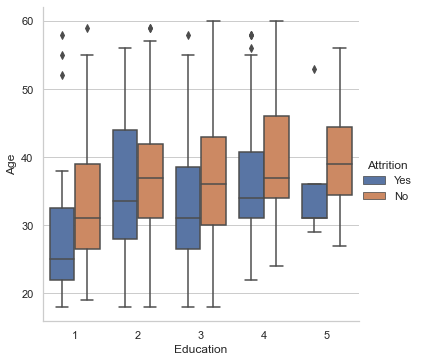

In [35]:
sns.catplot(x="Education", y="Age", hue="Attrition", kind="box", data=df)

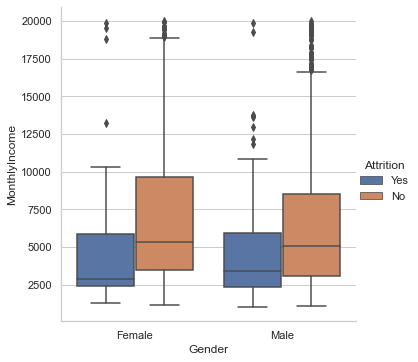

In [36]:
sns.catplot(x="Gender", y="MonthlyIncome", hue="Attrition", kind="box", data=df)

(array([606.,   0.,  82.,   0., 464.,   0., 159.,   0., 132.,  27.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

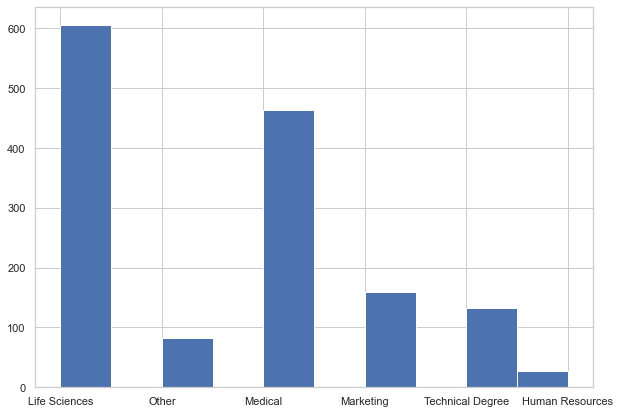

In [37]:
fig = plt.figure(figsize =(10, 7))
plt.hist(data["EducationField"])

In [38]:
du=(df.groupby(["EducationField","Attrition"]).count()["Age"]/df.groupby(["EducationField"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   Attrition          
Human Resources  No         0.740741
                 Yes        0.259259
Life Sciences    No         0.853135
                 Yes        0.146865
Marketing        No         0.779874
                 Yes        0.220126
Medical          No         0.864224
                 Yes        0.135776
Other            No         0.865854
                 Yes        0.134146
Technical Degree No         0.757576
                 Yes        0.242424

<AxesSubplot:xlabel='EducationField,Attrition'>

<Figure size 720x504 with 0 Axes>

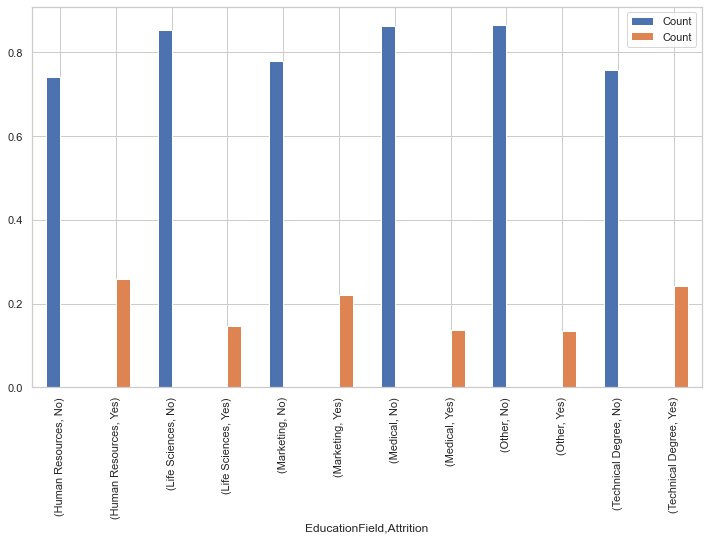

In [39]:

fig = plt.figure(figsize =(10, 7))
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(12,7))

In [40]:
df.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1], dtype=int64)

In [41]:
du=(df.groupby(["Department","EnvironmentSatisfaction"]).count()["Age"]/df.groupby(["Department"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Department             EnvironmentSatisfaction          
Human Resources        1                        0.174603
                       2                        0.190476
                       3                        0.412698
                       4                        0.222222
Research & Development 1                        0.194589
                       2                        0.184183
                       3                        0.303850
                       4                        0.317378
Sales                  1                        0.192825
                       2                        0.219731
                       3                        0.302691
                       4                        0.284753

<AxesSubplot:xlabel='Department,EnvironmentSatisfaction'>

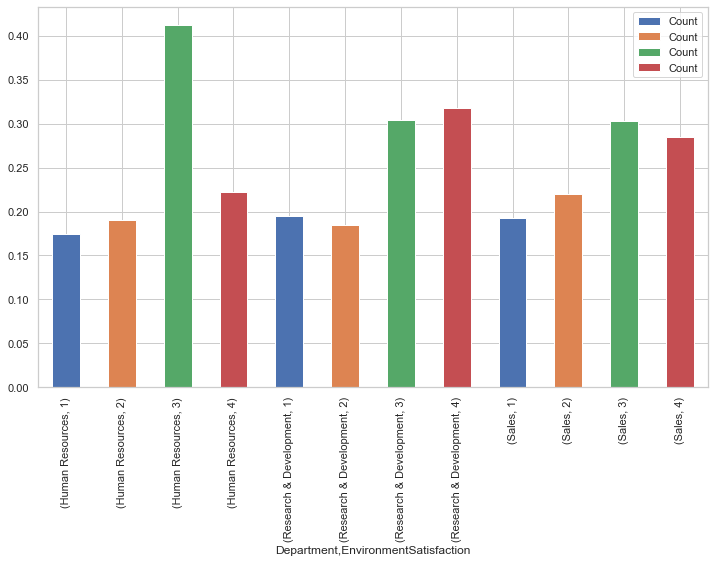

In [42]:
pd.concat(
    [du.iloc[::4], du.iloc[1::4],du.iloc[2::4],du.iloc[3::4]],
    axis=1).plot.bar(figsize=(12,7), stacked=True)

In [43]:
du=(df.groupby(["EnvironmentSatisfaction","Attrition"]).count()["Age"]/df.groupby(["EnvironmentSatisfaction"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EnvironmentSatisfaction Attrition          
1                       No         0.746479
                        Yes        0.253521
2                       No         0.850174
                        Yes        0.149826
3                       No         0.863135
                        Yes        0.136865
4                       No         0.865471
                        Yes        0.134529

<AxesSubplot:xlabel='EnvironmentSatisfaction,Attrition'>

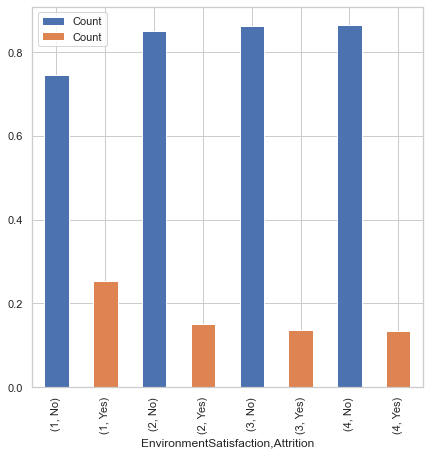

In [44]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(7,7), stacked=True)

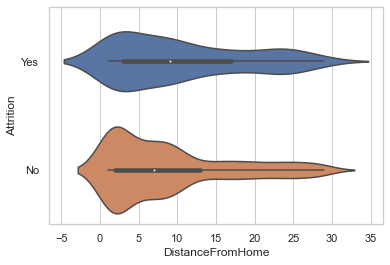

In [45]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["DistanceFromHome"], y=df["Attrition"])

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

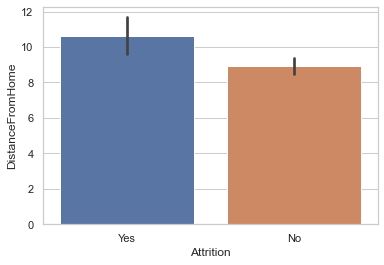

In [46]:
sns.barplot(x = 'Attrition',y = 'DistanceFromHome',data = df)

In [47]:
(df.groupby(["JobInvolvement","MaritalStatus","Gender"]).count()["JobLevel"])

JobInvolvement  MaritalStatus  Gender
1               Divorced       Female      8
                               Male       14
                Married        Female     13
                               Male       20
                Single         Female     10
                               Male       18
2               Divorced       Female     26
                               Male       45
                Married        Female     76
                               Male       99
                Single         Female     57
                               Male       72
3               Divorced       Female     71
                               Male      129
                Married        Female    159
                               Male      232
                Single         Female    115
                               Male      162
4               Divorced       Female     12
                               Male       22
                Married        Female     24
                 

In [48]:
du=(df.groupby(["JobInvolvement","MaritalStatus","Gender"]).count()["JobLevel"]/df.groupby(["JobInvolvement"]).count()["JobLevel"])
du=du.to_frame()
du=du.rename(columns = {'JobLevel': 'Count'}, inplace = False)
du

Count
JobInvolvement MaritalStatus Gender          
1              Divorced      Female  0.096386
                             Male    0.168675
               Married       Female  0.156627
                             Male    0.240964
               Single        Female  0.120482
                             Male    0.216867
2              Divorced      Female  0.069333
                             Male    0.120000
               Married       Female  0.202667
                             Male    0.264000
               Single        Female  0.152000
                             Male    0.192000
3              Divorced      Female  0.081797
                             Male    0.148618
               Married       Female  0.183180
                             Male    0.267281
               Single        Female  0.132488
                             Male    0.186636
4              Divorced      Female  0.083333
                             Male    0.152778
               Married       Female  0.166667
                             Male    0.347222
               Single        Female  0.118056
                             Male    0.131944

<AxesSubplot:xlabel='JobInvolvement,MaritalStatus,Gender'>

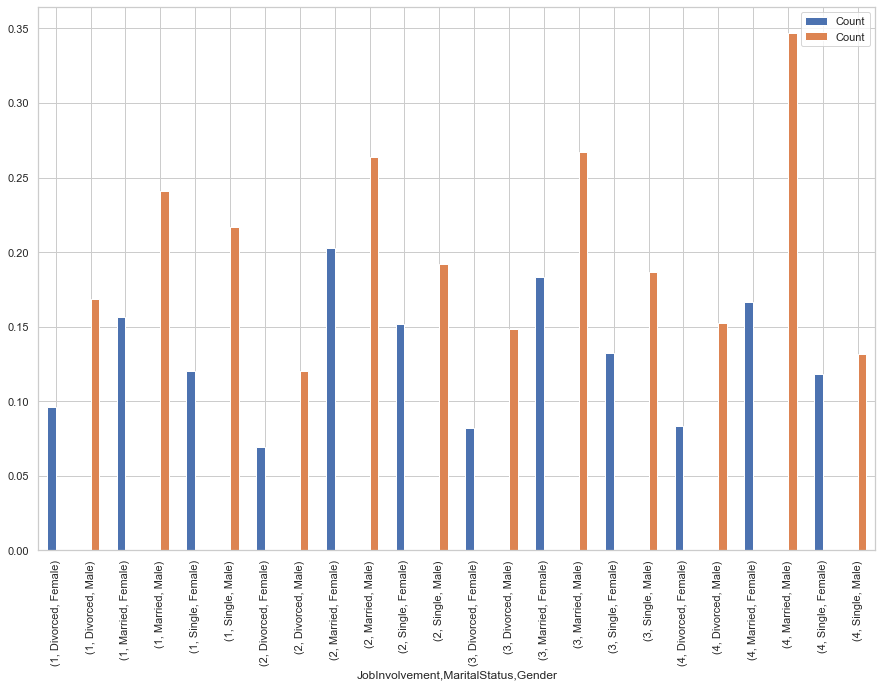

In [49]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,10))

In [50]:
du=(df.groupby(["JobInvolvement","Attrition","Gender"]).count()["Age"]/df.groupby(["JobInvolvement"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
JobInvolvement Attrition Gender          
1              No        Female  0.228916
                         Male    0.433735
               Yes       Female  0.144578
                         Male    0.192771
2              No        Female  0.362667
                         Male    0.448000
               Yes       Female  0.061333
                         Male    0.128000
3              No        Female  0.344470
                         Male    0.511521
               Yes       Female  0.052995
                         Male    0.091014
4              No        Female  0.326389
                         Male    0.583333
               Yes       Female  0.041667
                         Male    0.048611

<AxesSubplot:xlabel='JobInvolvement,Attrition,Gender'>

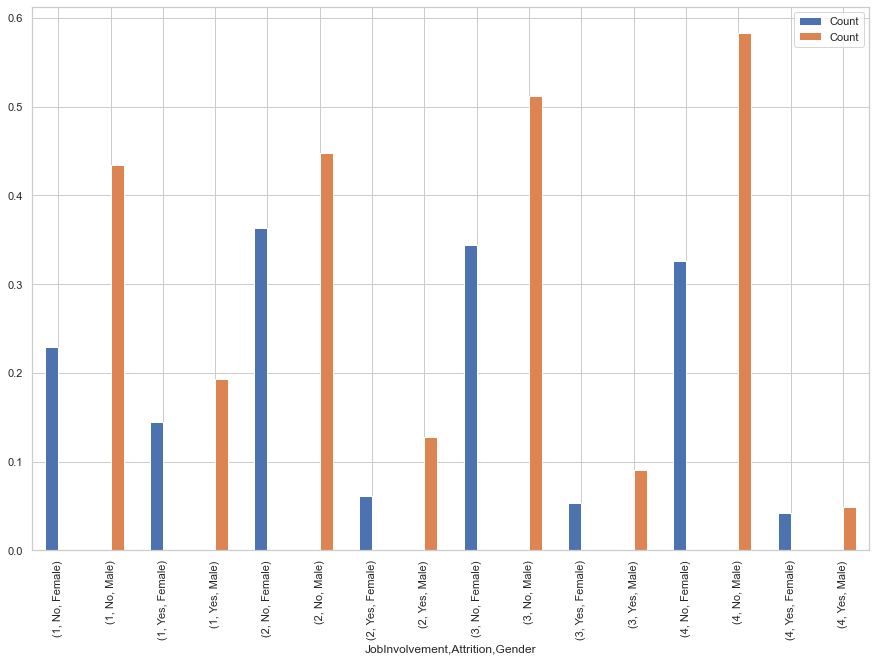

In [51]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,10))

In [52]:
df.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

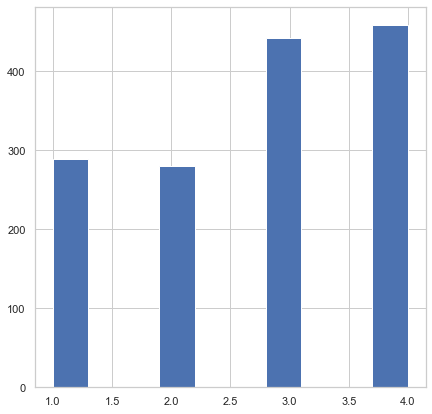

In [53]:
fig = plt.figure(figsize =(7, 7))
plt.hist(df["JobSatisfaction"])
plt.show()

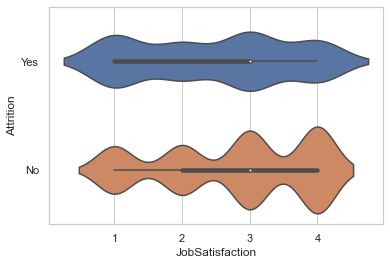

In [54]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["JobSatisfaction"], y=df["Attrition"])

In [55]:
du=(df.groupby(["JobSatisfaction","Attrition"]).count()["Age"]/df.groupby(["JobSatisfaction"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
JobSatisfaction Attrition          
1               No         0.771626
                Yes        0.228374
2               No         0.835714
                Yes        0.164286
3               No         0.834842
                Yes        0.165158
4               No         0.886710
                Yes        0.113290

<AxesSubplot:xlabel='JobSatisfaction,Attrition'>

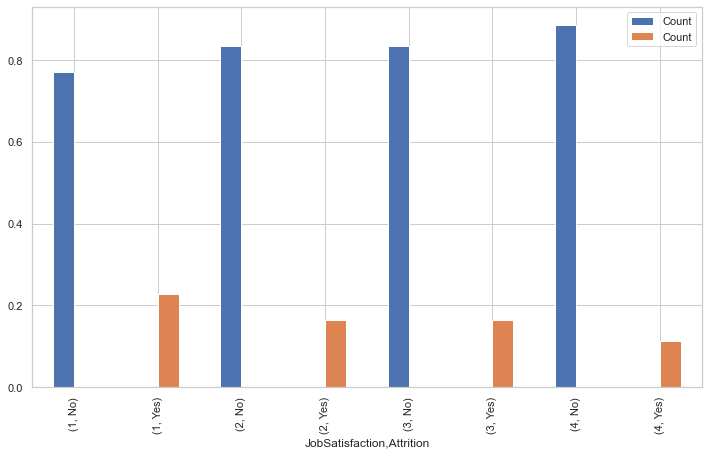

In [56]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(12,7))

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

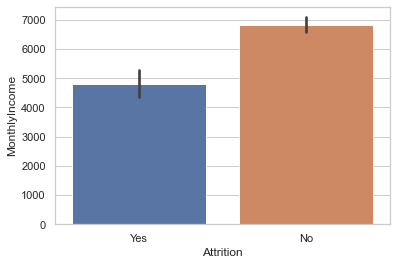

In [57]:
sns.barplot(x = 'Attrition',y = 'MonthlyIncome',data = df)

In [58]:
du=(df.groupby(["JobRole","Attrition"]).count()["Age"]/df.groupby(["JobRole"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
JobRole                   Attrition          
Healthcare Representative No         0.931298
                          Yes        0.068702
Human Resources           No         0.769231
                          Yes        0.230769
Laboratory Technician     No         0.760618
                          Yes        0.239382
Manager                   No         0.950980
                          Yes        0.049020
Manufacturing Director    No         0.931034
                          Yes        0.068966
Research Director         No         0.975000
                          Yes        0.025000
Research Scientist        No         0.839041
                          Yes        0.160959
Sales Executive           No         0.825153
                          Yes        0.174847
Sales Representative      No         0.602410
                          Yes        0.397590

<AxesSubplot:xlabel='JobRole,Attrition'>

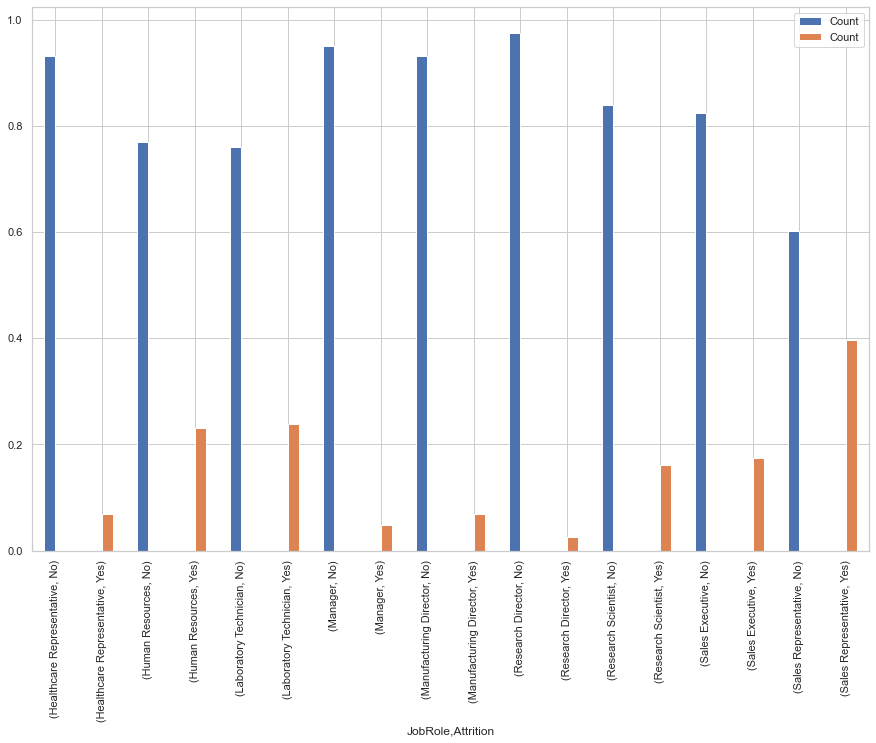

In [59]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,10))

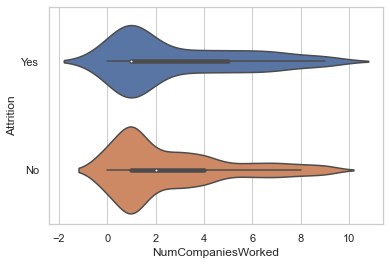

In [60]:
#Plotting a violin plot for NumCompaniesWorked Vs Attrition
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["NumCompaniesWorked"], y=df["Attrition"])

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

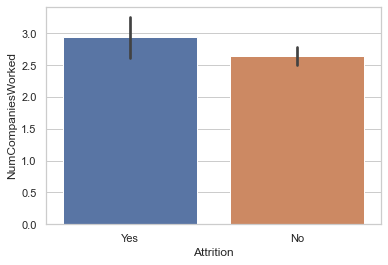

In [61]:
sns.barplot(x = 'Attrition',y = 'NumCompaniesWorked',data = df)

In [62]:
(df.groupby(["PercentSalaryHike","Attrition"]).count()["PerformanceRating"])

PercentSalaryHike  Attrition
11                 No           169
                   Yes           41
12                 No           165
                   Yes           33
13                 No           175
                   Yes           34
14                 No           177
                   Yes           24
15                 No            83
                   Yes           18
16                 No            64
                   Yes           14
17                 No            68
                   Yes           14
18                 No            76
                   Yes           13
19                 No            67
                   Yes            9
20                 No            48
                   Yes            7
21                 No            43
                   Yes            5
22                 No            44
                   Yes           12
23                 No            22
                   Yes            6
24                 No            15

In [63]:
#Table which describes the relation between PercentSalaryHike and OverTime
du=(df.groupby(["PercentSalaryHike","Attrition"]).count()["Age"]/df.groupby(["PercentSalaryHike"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
PercentSalaryHike Attrition          
11                No         0.804762
                  Yes        0.195238
12                No         0.833333
                  Yes        0.166667
13                No         0.837321
                  Yes        0.162679
14                No         0.880597
                  Yes        0.119403
15                No         0.821782
                  Yes        0.178218
16                No         0.820513
                  Yes        0.179487
17                No         0.829268
                  Yes        0.170732
18                No         0.853933
                  Yes        0.146067
19                No         0.881579
                  Yes        0.118421
20                No         0.872727
                  Yes        0.127273
21                No         0.895833
                  Yes        0.104167
22                No         0.785714
                  Yes        0.214286
23                No         0.785714
                  Yes        0.214286
24                No         0.714286
                  Yes        0.285714
25                No         0.944444
                  Yes        0.055556

<AxesSubplot:xlabel='PercentSalaryHike,Attrition'>

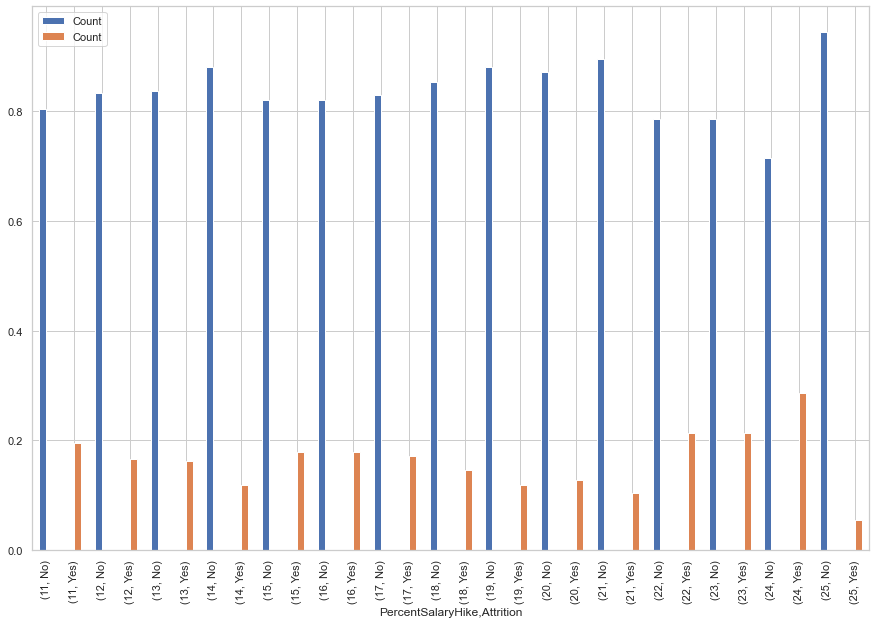

In [64]:
#Bar graph deploying the relation between PercentSalaryHike and Attrition
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,10))

In [65]:
du=(df.groupby(["YearsAtCompany","Attrition"]).count()["Age"]/df.groupby(["YearsAtCompany"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
YearsAtCompany Attrition          
0              No         0.636364
               Yes        0.363636
1              No         0.654971
               Yes        0.345029
2              No         0.787402
...                            ...
33             Yes        0.200000
34             No         1.000000
36             No         1.000000
37             No         1.000000
40             Yes        1.000000

[64 rows x 1 columns]

In [66]:
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

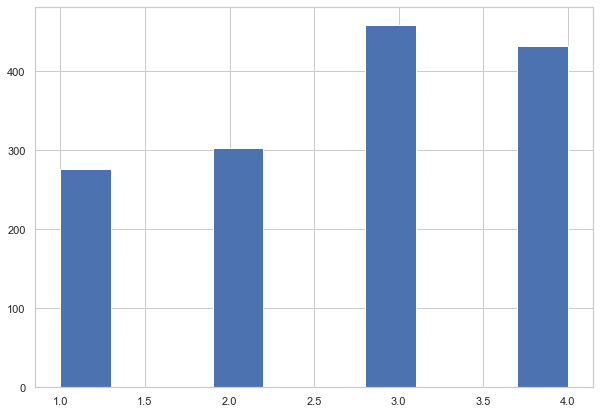

In [67]:
#RelatioonshipSatisfaction bar graph
fig = plt.figure(figsize =(10, 7))
plt.hist(df["RelationshipSatisfaction"])
plt.show()

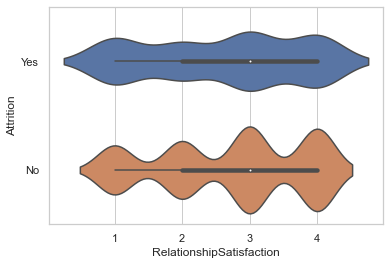

In [68]:
#Violin plot showing the relationship between Attrition and RelationshipSatisfaction
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["RelationshipSatisfaction"], y=df["Attrition"])

In [69]:
du=(df.groupby(["RelationshipSatisfaction","Attrition"]).count()["Age"]/df.groupby(["RelationshipSatisfaction"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
RelationshipSatisfaction Attrition          
1                        No         0.793478
                         Yes        0.206522
2                        No         0.851485
                         Yes        0.148515
3                        No         0.845316
                         Yes        0.154684
4                        No         0.851852
                         Yes        0.148148

<AxesSubplot:xlabel='RelationshipSatisfaction,Attrition'>

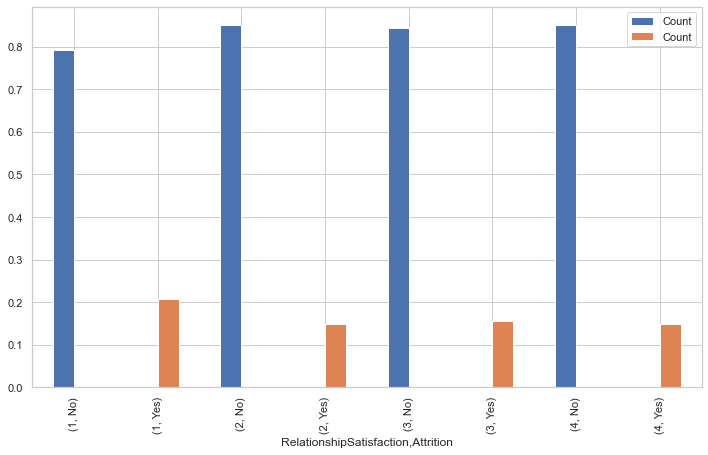

In [70]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(12,7))

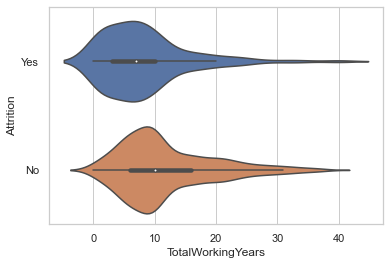

In [71]:
#TotalWorkingYears vs Attrition
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["TotalWorkingYears"], y=df["Attrition"])

In [72]:
df.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [73]:
du=(df.groupby(["StockOptionLevel","Attrition"]).count()["PerformanceRating"]/df.groupby(["StockOptionLevel"]).count()["PerformanceRating"])
du=du.to_frame()
du=du.rename(columns = {'PerformanceRating': 'Count'}, inplace = False)
du

Count
StockOptionLevel Attrition          
0                No         0.755943
                 Yes        0.244057
1                No         0.906040
                 Yes        0.093960
2                No         0.924051
                 Yes        0.075949
3                No         0.823529
                 Yes        0.176471

<AxesSubplot:xlabel='StockOptionLevel,Attrition'>

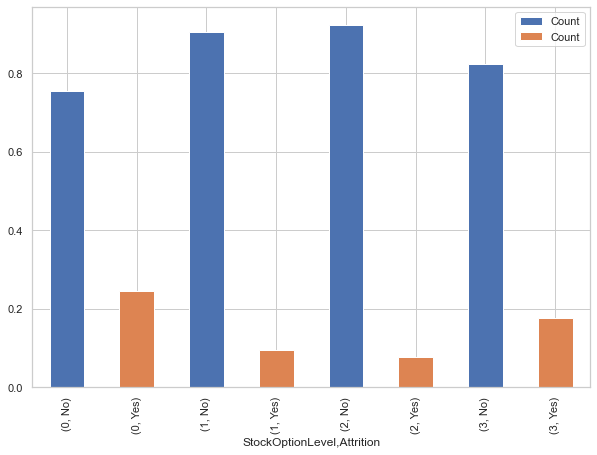

In [74]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(10,7), stacked=True)

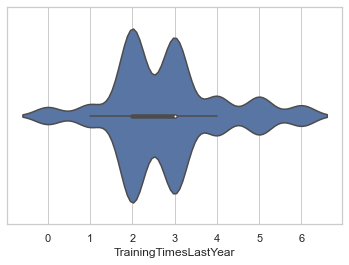

In [75]:
sns.set_theme(style="whitegrid")
train_vplot = sns.violinplot(x=df["TrainingTimesLastYear"])

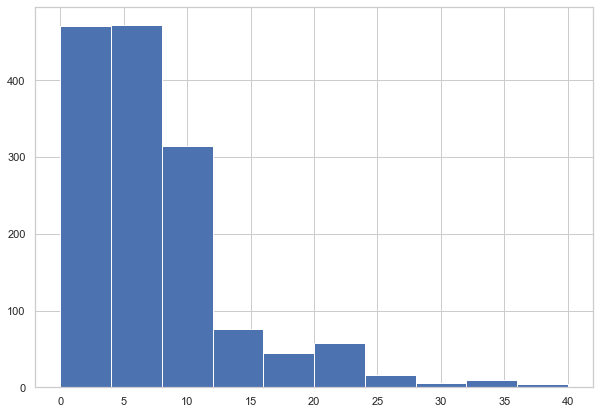

In [76]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["YearsAtCompany"])
plt.show()

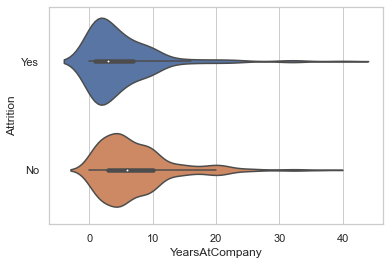

In [77]:
sns.set_theme(style="whitegrid")
ycompany_attr_vplot = sns.violinplot(x=df["YearsAtCompany"], y=df["Attrition"])

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

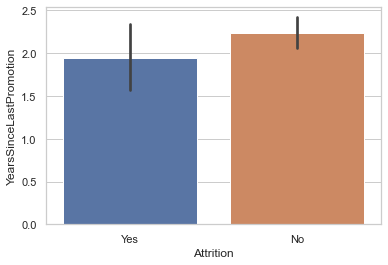

In [78]:
sns.barplot(x = 'Attrition',y = 'YearsSinceLastPromotion',data = df)

C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


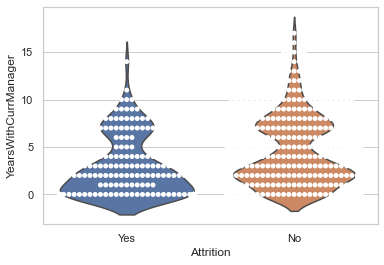

In [79]:
ax = sns.violinplot(x=df["Attrition"], y=df["YearsWithCurrManager"], inner=None)
ax = sns.swarmplot(x=df["Attrition"], y=df["YearsWithCurrManager"],
                   color="white", edgecolor="gray")

C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


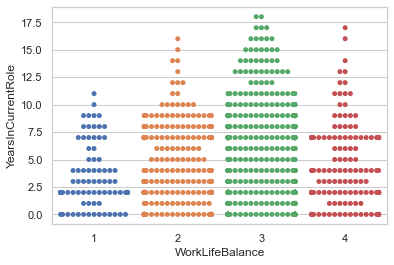

In [80]:
sns.set_theme(style="whitegrid")
ycurrmanager_swarmplot = sns.swarmplot(y=df['YearsInCurrentRole'], x=df["WorkLifeBalance"])

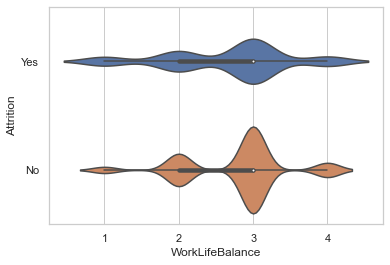

In [81]:
sns.set_theme(style="whitegrid")
ycurrentrole_vplot = sns.violinplot(x=df["WorkLifeBalance"], y=df["Attrition"])

In [82]:

du=(df.groupby(["Attrition","WorkLifeBalance","JobInvolvement"]).count()["Age"]/df.groupby(["WorkLifeBalance","JobInvolvement"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
WorkLifeBalance JobInvolvement Attrition          
1               1              No         0.250000
                               Yes        0.750000
                2              No         0.631579
                               Yes        0.368421
                3              No         0.705882
                               Yes        0.294118
                4              No         1.000000
2               1              No         0.550000
                               Yes        0.450000
                2              No         0.804878
                               Yes        0.195122
                3              No         0.853659
                               Yes        0.146341
                4              No         0.918919
                               Yes        0.081081
3               1              No         0.716981
                               Yes        0.283019
                2              No         0.836910
                               Yes        0.163090
                3              No         0.875969
                               Yes        0.124031
                4              No         0.890110
                               Yes        0.109890
4               1              No         0.833333
                               Yes        0.166667
                2              No         0.756098
                               Yes        0.243902
                3              No         0.833333
                               Yes        0.166667
                4              No         1.000000

<AxesSubplot:xlabel='WorkLifeBalance,JobInvolvement,Attrition'>

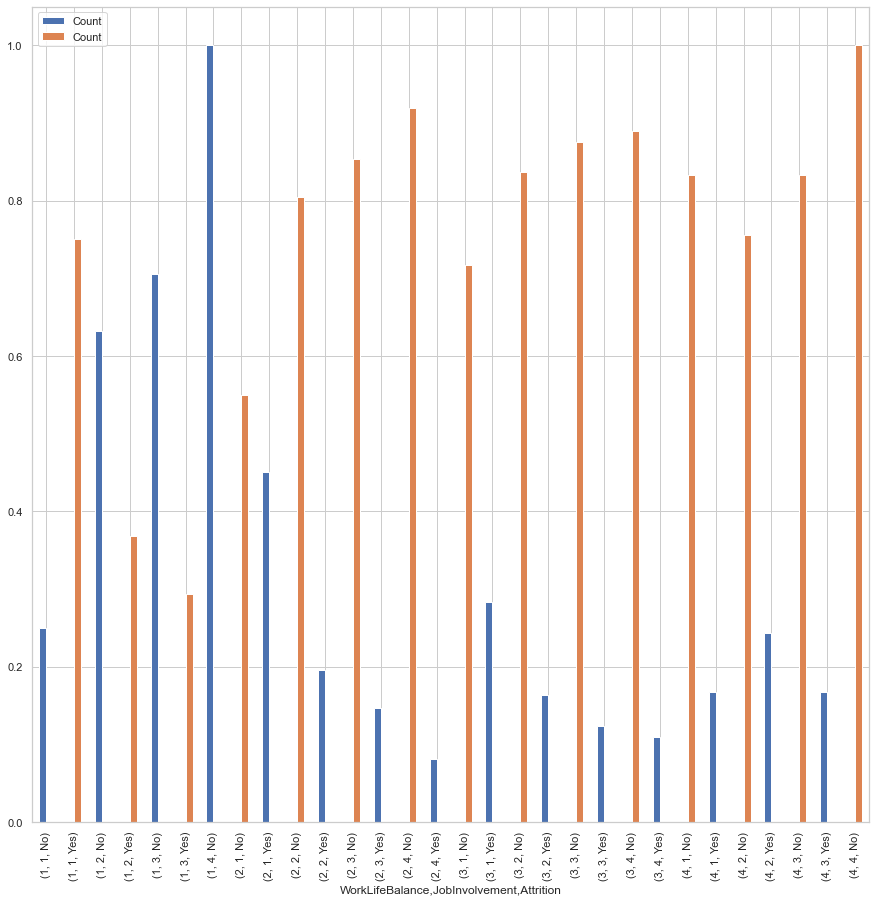

In [83]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))

In [84]:
du=(df.groupby(["JobRole","Attrition"]).count()["Age"]/df.groupby(["JobRole"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
JobRole                   Attrition          
Healthcare Representative No         0.931298
                          Yes        0.068702
Human Resources           No         0.769231
                          Yes        0.230769
Laboratory Technician     No         0.760618
                          Yes        0.239382
Manager                   No         0.950980
                          Yes        0.049020
Manufacturing Director    No         0.931034
                          Yes        0.068966
Research Director         No         0.975000
                          Yes        0.025000
Research Scientist        No         0.839041
                          Yes        0.160959
Sales Executive           No         0.825153
                          Yes        0.174847
Sales Representative      No         0.602410
                          Yes        0.397590

<AxesSubplot:xlabel='JobRole,Attrition'>

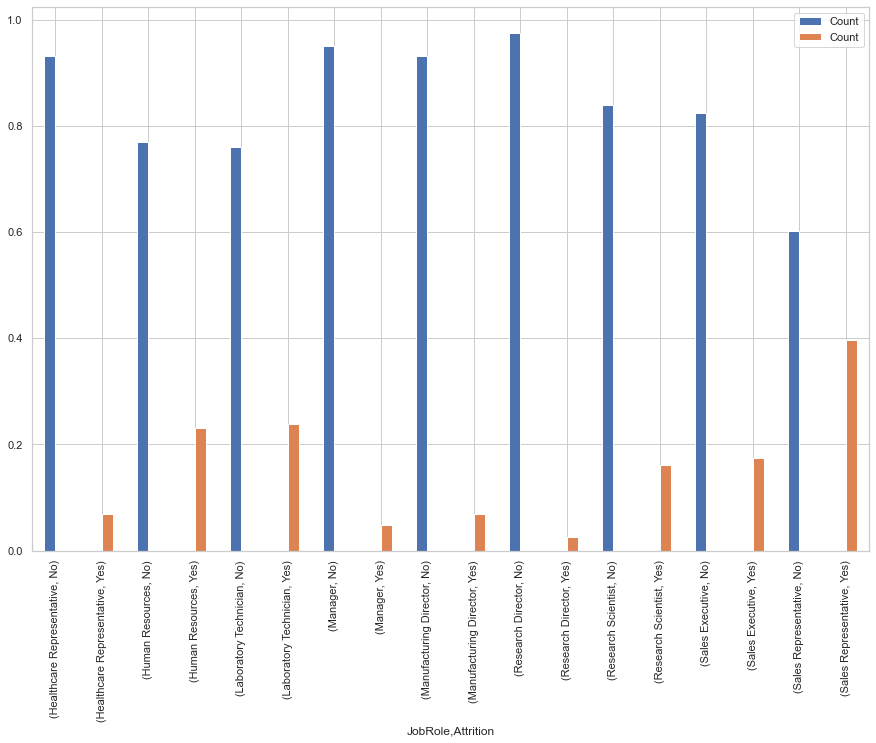

In [85]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='JobRole', ylabel='YearsSinceLastPromotion'>

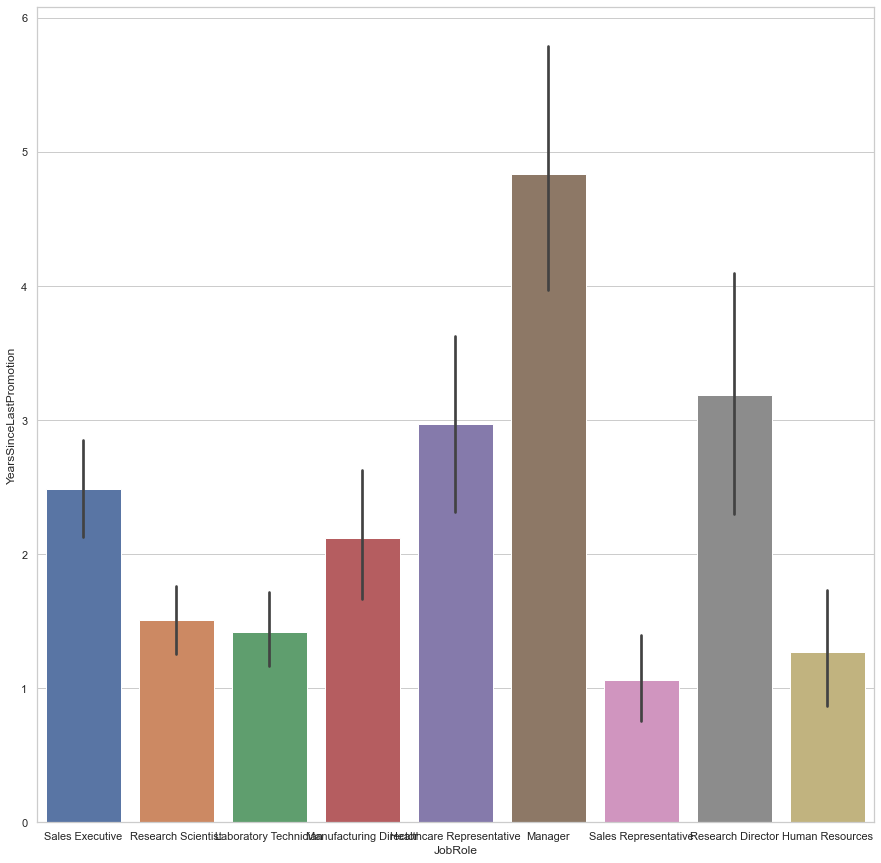

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.barplot(x = 'JobRole',y = 'YearsSinceLastPromotion',data = df)

In [87]:
du=(df.groupby(["WorkLifeBalance","Department","Attrition"]).count()["Age"]/df.groupby(["Department"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
WorkLifeBalance Department             Attrition          
1               Human Resources        No         0.063492
                Research & Development No         0.042664
                                       Yes        0.019771
                Sales                  No         0.022422
                                       Yes        0.013453
2               Human Resources        No         0.079365
                                       Yes        0.031746
                Research & Development No         0.211238
                                       Yes        0.033299
                Sales                  No         0.174888
                                       Yes        0.053812
3               Human Resources        No         0.523810
                                       Yes        0.142857
                Research & Development No         0.527575
                                       Yes        0.070760
                Sales                  No         0.506726
                                       Yes        0.112108
4               Human Resources        No         0.142857
                                       Yes        0.015873
                Research & Development No         0.080125
                                       Yes        0.014568
                Sales                  No         0.089686
                                       Yes        0.026906

<AxesSubplot:xlabel='WorkLifeBalance,Department,Attrition'>

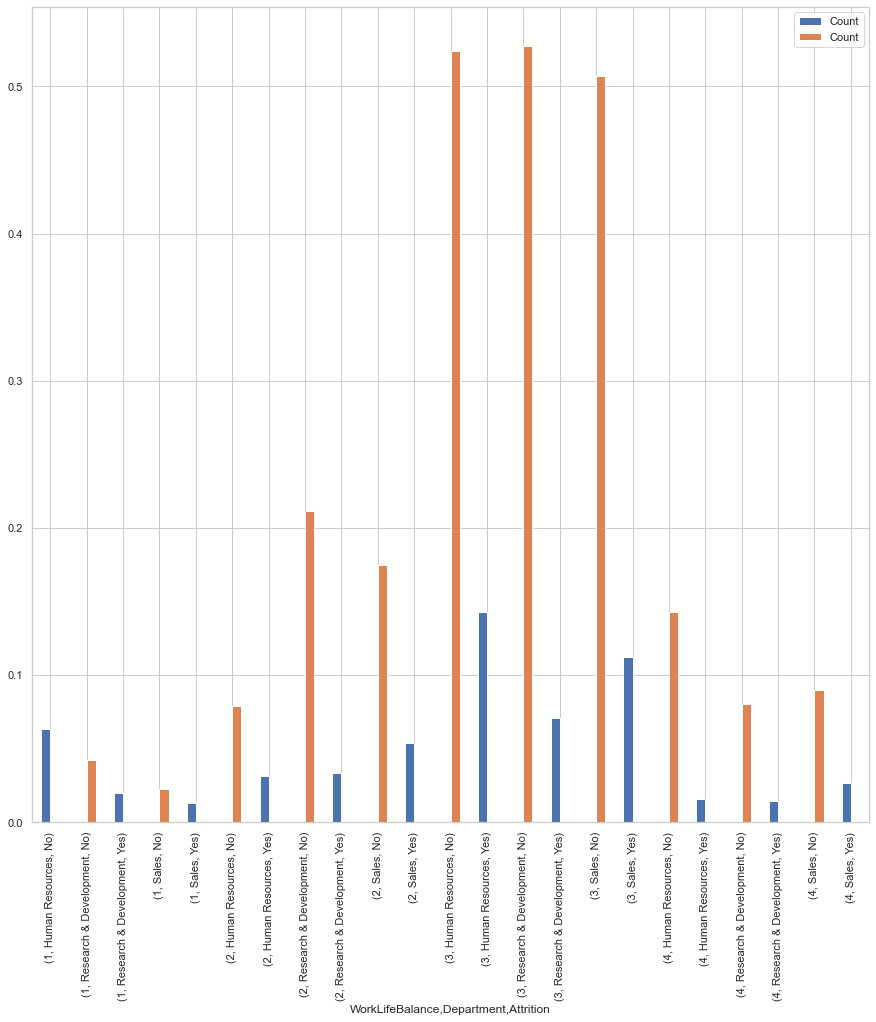

In [88]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))

In [89]:
du=(df.groupby(["JobRole","OverTime","Attrition"]).count()["Age"]/df.groupby(["OverTime"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)

<AxesSubplot:xlabel='JobRole,OverTime,Attrition'>

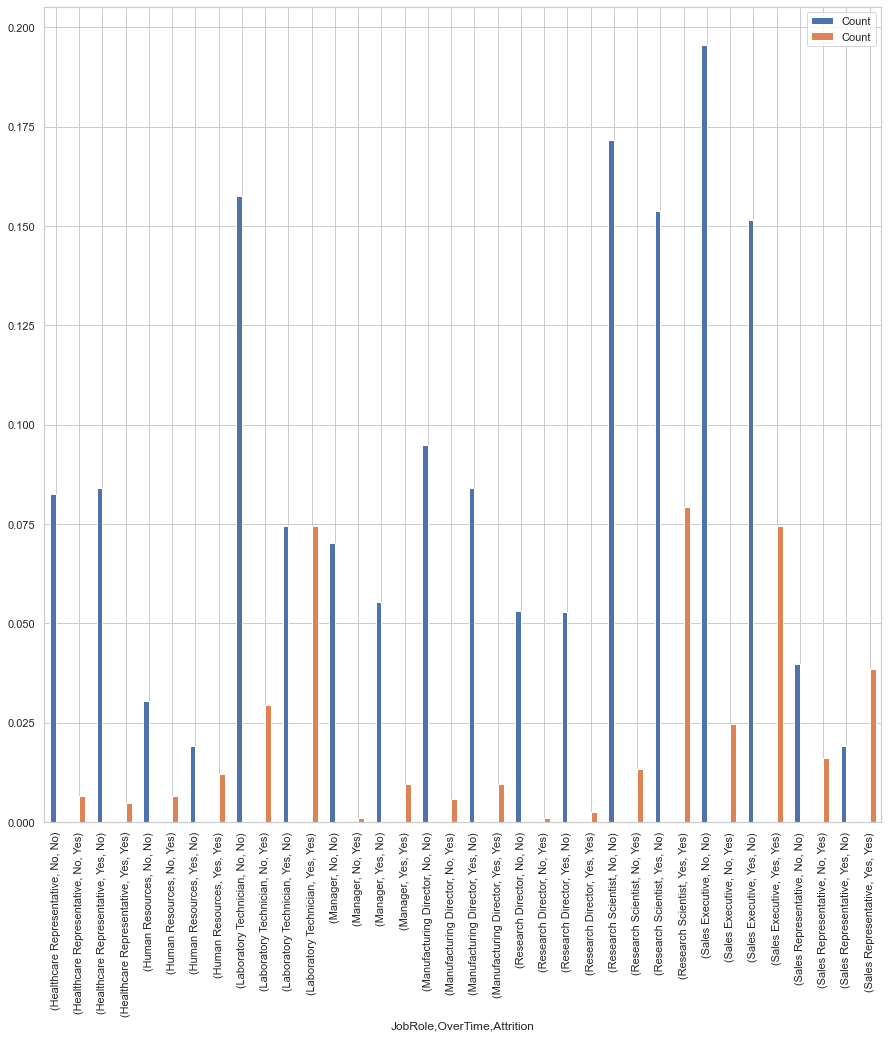

In [90]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))

<AxesSubplot:>

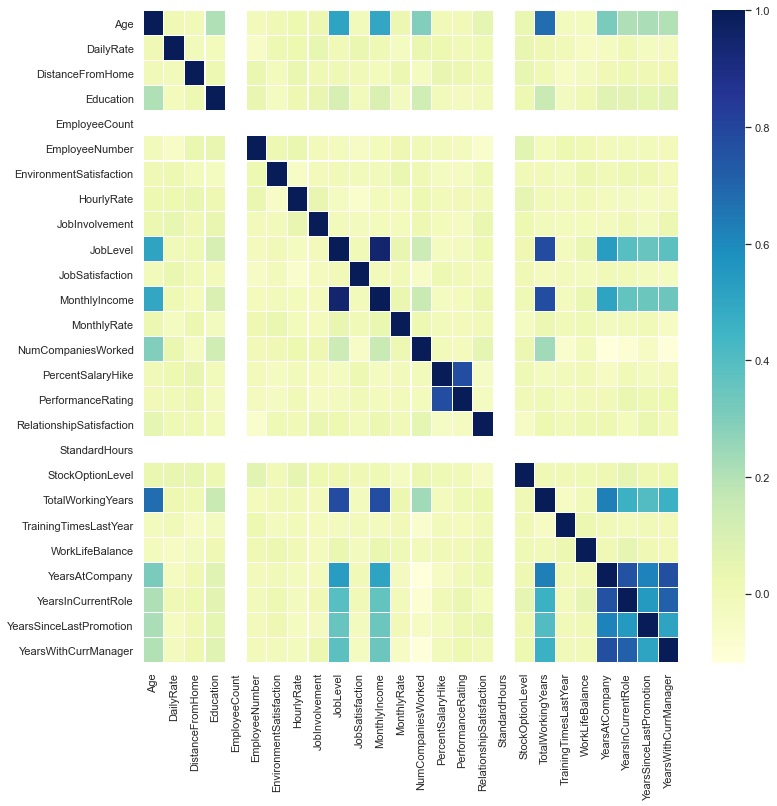

In [91]:
#Finding the correlation between the categorical attributes of the dataset
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(12, 12))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [92]:
#PCA
from sklearn.preprocessing import StandardScaler

In [93]:
scalar = StandardScaler()
  
# fitting
new_df= df.drop(columns=["Department","Attrition","Education","EducationField","EnvironmentSatisfaction","Gender","JobLevel","JobRole","JobSatisfaction","MaritalStatus","OverTime", "PerformanceRating",  "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear",  "WorkLifeBalance" ],axis=1)
scalar.fit(new_df)
scaled_data = scalar.transform(new_df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 3
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(1470, 2)

Text(0, 0.5, 'Second Principal Component')

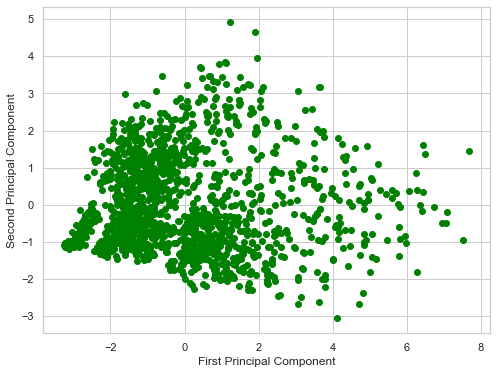

In [94]:
# giving a larger plot
plt.figure(figsize =(8, 6))
q=list()

for i in df["Attrition"]:
  if i == "Yes": 
    x = "blue" 
  elif i=="No": 
    x="Green" 

q.append(x)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c= q)
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [95]:
# components
pca.components_

array([[ 0.28029343,  0.00477206, -0.00100522,  0.3606615 ,  0.03093348,
        -0.0153513 ,  0.41535859,  0.44351417,  0.39143003,  0.34430649,
         0.38620014],
       [ 0.47984356, -0.05482509,  0.02433227,  0.29419313,  0.56514968,
        -0.00809611,  0.32124404, -0.21442391, -0.28576735, -0.20144374,
        -0.29786758]])

<AxesSubplot:>

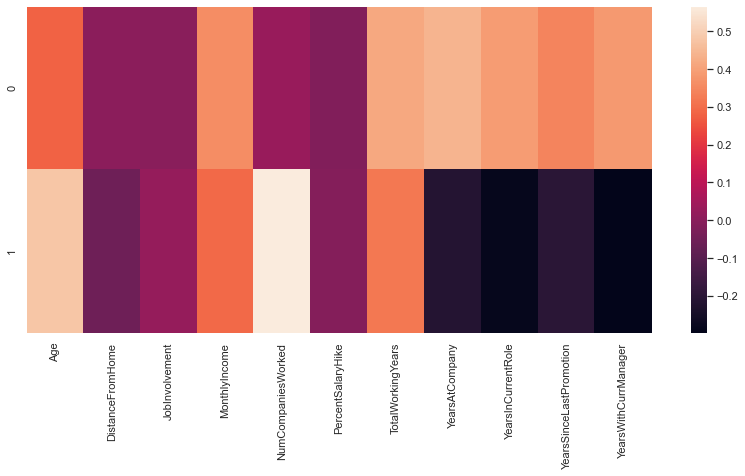

In [96]:
df_comp = pd.DataFrame(pca.components_, columns = new_df.columns)
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

In [97]:
df1.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1,1,2,1,2,2,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,2,8,1,1,3,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,2,2,6,4,1,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,2,3,4,1,4,2,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,2,1,2,1,1,3,1,...,3,4,1,6,3,3,2,2,2,2


In [98]:
df1.describe()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.161224,1.739456,9.192517,2.912925,2.153741,2.721769,1.400000,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.527792,8.106864,1.024165,1.383865,1.093082,0.490065,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1.000000,2.000000,7.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,2.000000,14.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2.000000,3.000000,29.000000,5.000000,6.000000,4.000000,2.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [99]:
y=df1['Attrition']
X=df1.drop('Attrition',axis=1)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [101]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 40)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=40)

In [102]:
y_pred = regressor.predict(X_test)

In [103]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
1316,1,1.180
481,1,1.238
853,1,1.483
302,1,1.213
41,1,1.243
...,...,...
250,2,1.109
53,1,1.041
839,1,1.202
1110,2,1.613


In [104]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.22552721088435376
Mean Squared Error: 0.11563840476190475
Root Mean Squared Error: 0.34005647290105323


In [105]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.23 degrees.


In [106]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.15 %.


C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


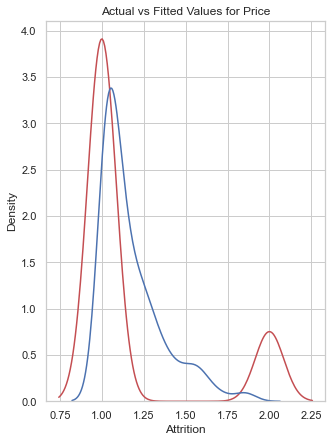

In [107]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()

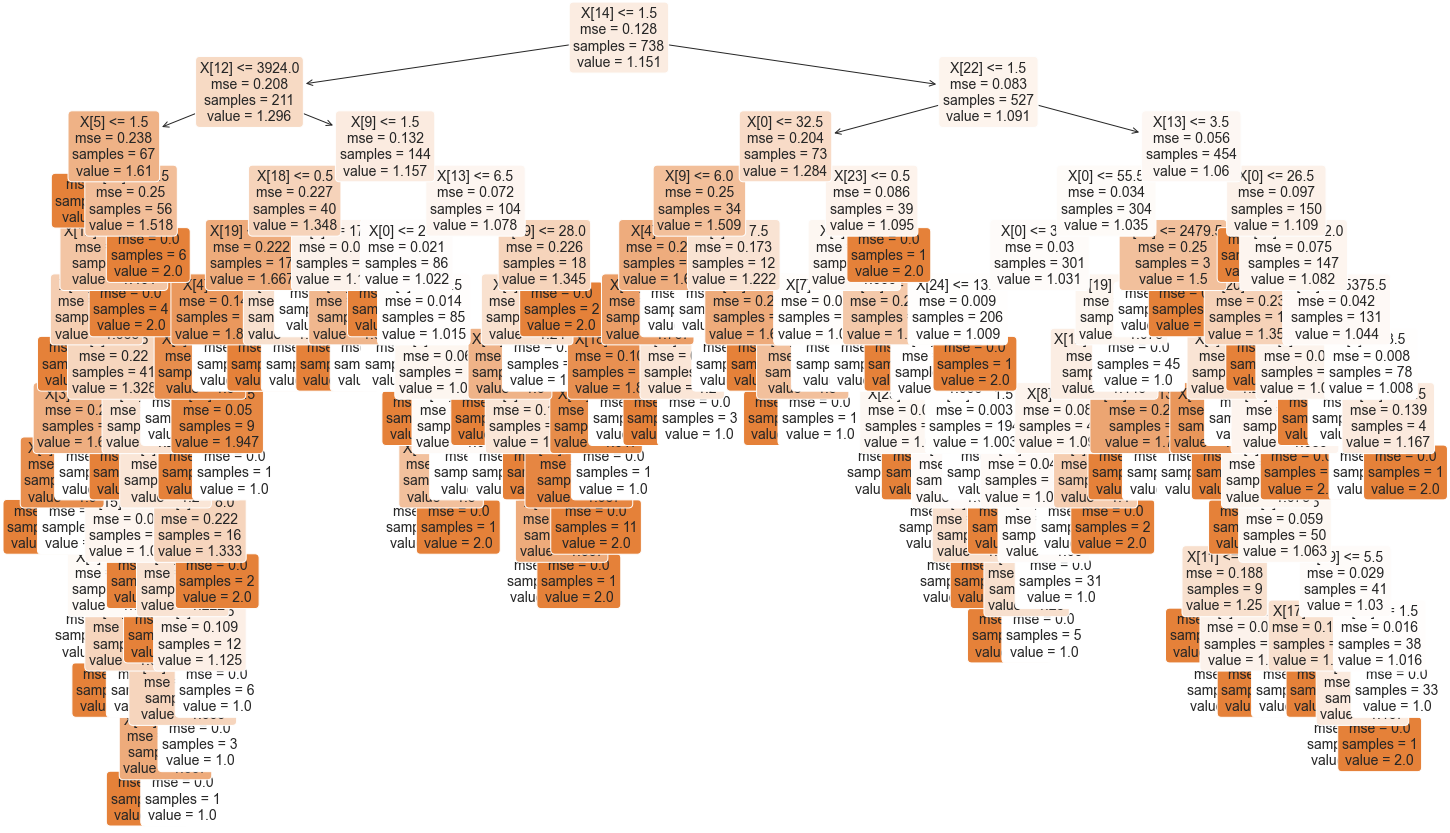

In [108]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [109]:
importances = pd.DataFrame({'feature':df1.iloc[:, 1:df.shape[1]].columns,'importance':np.round(regressor.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.129
Attrition,0.077
DistanceFromHome,0.072
OverTime,0.072
NumCompaniesWorked,0.055
TotalWorkingYears,0.052
YearsAtCompany,0.043
EnvironmentSatisfaction,0.042
PercentSalaryHike,0.042


<AxesSubplot:xlabel='feature'>

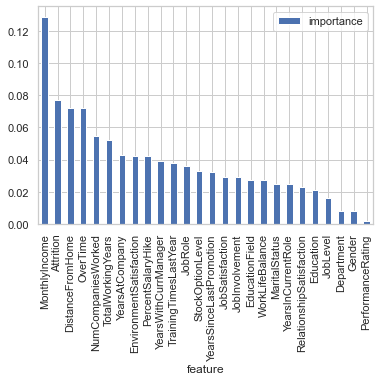

In [110]:
importances.plot.bar()

In [111]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#forest = RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [112]:
forest.score(X_train, y_train)
forest.predict(X_test)

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [113]:
forest.predict_proba(X_test)[0:10]
preds = forest.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Attrition'], colnames=['Predicted Attrition'])

Predicted Attrition,1,2
Actual Attrition,,
1,236,6
2,40,12


In [114]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Mean Absolute Error: 0.1564625850340136
Mean Squared Error: 0.1564625850340136
Root Mean Squared Error: 0.3955535172818131


In [115]:
# Calculate the absolute errors
errors = abs(preds - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.


In [116]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.16 %.


C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Akshay\Amit\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


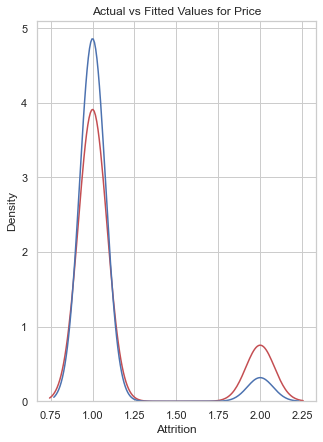

In [117]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(preds, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()

In [118]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC()
# fit classifier to training set
svc.fit(X_train,y_train)

SVC()

In [119]:
# make predictions on test set
y_pred2=svc.predict(X_test)

In [120]:
# compute and print accuracy score
accuracy_score(y_test,y_pred2)*100

82.31292517006803

In [121]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [122]:
#Create a Gaussian Classifier
model = GaussianNB()
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

In [123]:
print('Accuracy:',accuracy_score(y_test, y_pred3)*100,'%')

Accuracy: 77.21088435374149 %


In [124]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [125]:
k_range=range(1,19)
scores={}

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred4=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred4)

In [126]:
print(scores)

{1: 0.7585034013605442, 2: 0.8163265306122449, 3: 0.7959183673469388, 4: 0.8197278911564626, 5: 0.8095238095238095, 6: 0.8231292517006803, 7: 0.8231292517006803, 8: 0.8163265306122449, 9: 0.8163265306122449, 10: 0.8197278911564626, 11: 0.8231292517006803, 12: 0.8231292517006803, 13: 0.8231292517006803, 14: 0.8163265306122449, 15: 0.8197278911564626, 16: 0.8197278911564626, 17: 0.8197278911564626, 18: 0.8197278911564626}


In [127]:
print(y_pred4)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1316    1
481     1
853     1
302     1
41      1
       ..
250     2
53      1
839     1
1110    2
552     1
Name: Attrition, Length: 294, dtype: int64


In [128]:
print('Accuracy:',accuracy_score(y_test,y_pred4)*100,'%')

Accuracy: 81.97278911564626 %
